In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from xlrd.xldate import xldate_as_datetime

Attached are three sets of data related to the marketing channel performance of a hypothetical business with similar seasonality to ours.  Please review this information, and prepare the following: 
Analysis of the historical performance of the company and it's marketing efforts 

Recommendation of which channel(s) the company should focus on in the next year (2018) 

Cost and Revenue forecast for the entire company (all channels combined) by day for the two weeks leading up to Valentine's Day 2018 
Explanation of any assumptions you make, potential risks to your recommendations/analysis, and additional data you would want to look at to improve the accuracy of your analysis/recommendations 

Definitions: 

Date – Date the order was placed 

Channel – The marketing channel 

Sessions – The amount of traffic to the site 

Transactions – The order count 

Revenue – The association amount of money made. 

AOV – Average order volume 

CPA – Cost per acquisition (order) 

In [28]:
df_1 = pd.read_csv("Data 1.csv")
df_2 = pd.read_csv("Data 2.csv")
df_3 = pd.read_csv("Data 3.csv")

In [67]:
df_1['Date'] = df_1.Date.apply(lambda x: xldate_as_datetime(x, 0))
df_2['Date'] = df_2.Date.apply(lambda x: xldate_as_datetime(x, 0))

In [43]:
df_1.head()

,Date,Channel,Conversion Rate,Transactions,AOV,CPA,datetime
0,42404,Channel B,0.091545,1313,60.41,15,2016-02-04
1,42401,Channel C,0.070204,936,64.96,8,2016-02-01
2,42408,Channel D,0.153458,1885,69.67,18,2016-02-08
3,42408,Channel C,0.185907,1653,66.36,7,2016-02-08
4,42404,Channel D,0.129013,1113,68.35,19,2016-02-04


In [42]:
df_2.head()

,Date,Channel,Sessions,Revenue,AOV,CPA,datetime
0,42735,Channel A,1377,19327,74.70,8,2016-12-31
1,42735,Channel B,1161,8628,90.79,34,2016-12-31
2,42735,Channel C,2409,15758,79.11,5,2016-12-31
3,42735,Channel D,2563,15708,81.00,19,2016-12-31
4,42734,Channel A,2416,37456,76.96,4,2016-12-30


In [44]:
df_3.head()

,Date,Channel,Sessions,Transactions,AOV,CPA
0,12/31/2017,Channel A,1155,263,58.97,10
1,12/31/2017,Channel B,1311,108,72.06,27
2,12/31/2017,Channel C,1322,115,56.51,5
3,12/31/2017,Channel D,2320,198,63.71,14
4,12/30/2017,Channel A,1674,341,59.21,3


In [49]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
Date               156 non-null int64
Channel            156 non-null object
Conversion Rate    156 non-null float64
Transactions       156 non-null int64
AOV                156 non-null float64
CPA                156 non-null int64
datetime           156 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 8.6+ KB


In [50]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 7 columns):
Date        1308 non-null int64
Channel     1308 non-null object
Sessions    1308 non-null int64
Revenue     1308 non-null int64
AOV         1308 non-null float64
CPA         1308 non-null int64
datetime    1308 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 71.6+ KB


In [51]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 6 columns):
Date            1400 non-null object
Channel         1400 non-null object
Sessions        1400 non-null int64
Transactions    1400 non-null int64
AOV             1400 non-null float64
CPA             1400 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 65.7+ KB


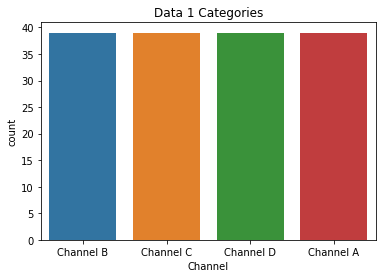

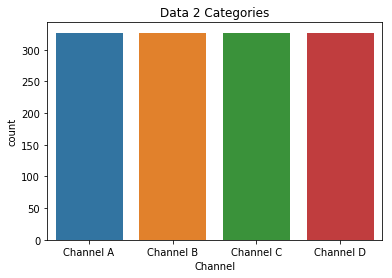

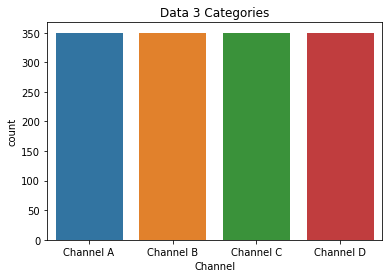

In [58]:
plt.title('Data 1 Categories')
sns.countplot(df_1.Channel)
plt.show()
plt.title('Data 2 Categories')
sns.countplot(df_2.Channel)
plt.show()
plt.title('Data 3 Categories')
sns.countplot(df_3.Channel)
plt.show()

In [68]:
# Sort by time
dfs = [df_1, df_2, df_3]
for df in dfs:
    df.sort_values(by=['Date', 'Channel'], inplace=True)

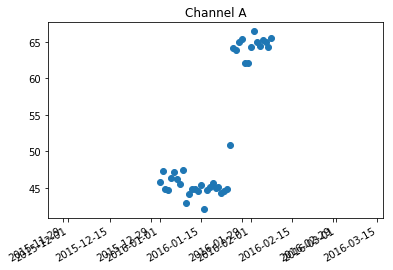

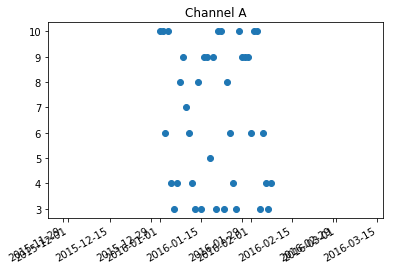

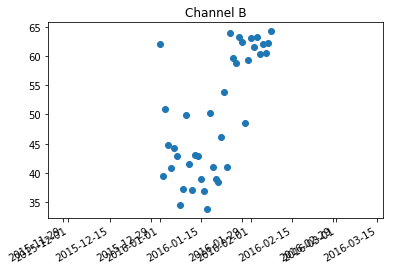

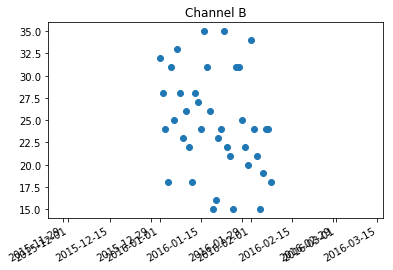

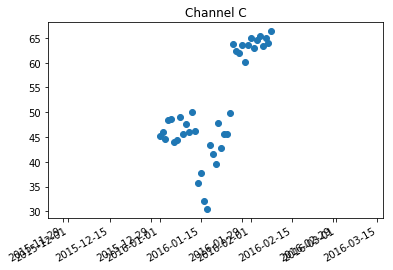

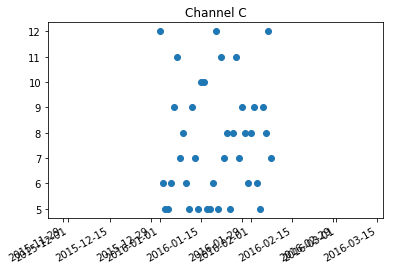

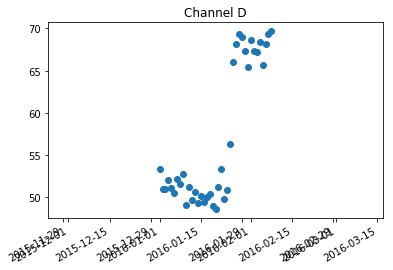

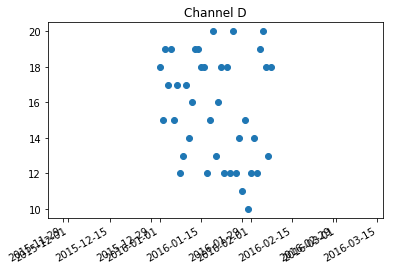

In [114]:
channels = ['Channel A', 'Channel B', 'Channel C', 'Channel D']

# Data 1
for channel in channels:
    temp = df_1[df_1.Channel == channel]
    
    # plot time vs AOV for each channel
    plt.figure()
    plt.title(channel)
    plt.scatter(temp.Date.values, temp.AOV.values)
    plt.gcf().autofmt_xdate()
    plt.show()
    
    # plot time vs CPA for each channel
    plt.figure()
    plt.title(channel)
    plt.scatter(temp.Date.values, temp.CPA.values)
    plt.gcf().autofmt_xdate()
    plt.show()
    

In [108]:
# see if there is any missing dates in Data 1
for df in dfs:
    print('New Dataset')
    print('# of Missing Dates:', len(pd.date_range(start = df.Date.values[0], 
                  end = df.Date.values[-1]).difference(pd.unique(df.Date.values))))
    print('Start Date:', str(df.Date.values[0])[:10])
    print('End Date:', str(df.Date.values[-1])[:10], '\n\n')

New Dataset
# of Missing Dates: 0
Start Date: 2016-01-01
End Date: 2016-02-08 


New Dataset
# of Missing Dates: 0
Start Date: 2016-02-09
End Date: 2016-12-31 


New Dataset
# of Missing Dates: 237
Start Date: 1/16/2017
End Date: 9/9/2017 




array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', '2016-01-04T00:00:00.000000000',
       '2016-01-05T00:00:00.000000000', '2016-01-06T00:00:00.000000000',
       '2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
       '2016-01-09T00:00:00.000000000', '2016-01-10T00:00:00.000000000',
       '2016-01-11T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
       '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
       '2016-01-15T00:00:00.000000000', '2016-01-16T00:00:00.000000000',
       '2016-01-17T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
       '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000',
       '2016-01-21T00:00:00.000000000', '2016-01-22T00:00:00.000000000',
       '2016-01-23T00:00:00.000000000', '2016-01-24T00:00:00.000000000',
       '2016-01-25T00:00:00.000000000', '2016-01-26T00:00:00.000000000',
       '2016-01-27T00:00:00.000000000', '2016-01-28